In [1]:
base_path = 'dataset/'

cookbook_file_path = base_path + 'cookbook.csv'
walkability_file_path = base_path + 'walkability_dataset.csv'
happiness_file_path = base_path + 'Happiness_index_merged.csv'

In [2]:
import pandas as pd

walkability_df = pd.read_csv(walkability_file_path)

In [3]:
from scripts.read_cookbook_csv_to_dict import read_cookbook_csv_to_dict

cookbook_dict = read_cookbook_csv_to_dict(cookbook_file_path)

In [4]:
from scripts.find_unused_columns import find_unused_columns

find_unused_columns(cookbook_dict, walkability_df)

all checked


In [5]:
walkability_df.describe()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CBSA,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,220740.000000,2.207390e+05,2.207400e+05,220740.000000,220740.000000,220740.000000,220740.000000,167709.000000,203645.000000,2.207400e+05,...,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,2.207400e+05
mean,110370.500000,2.870894e+11,2.870915e+11,28.623190,85.697449,262342.382110,2.221392,341.742661,30514.836210,3.607329e+06,...,-57326.486630,-57326.597590,-57326.483325,10.500000,10.500000,10.500000,7.624884,9.541628,1.655970e+04,4.466074e+07
std,63722.293548,1.640746e+11,1.640774e+11,16.386075,98.818946,351403.837442,1.195155,125.700068,10979.471375,5.219925e+06,...,49459.959391,49459.830782,49459.963223,5.766294,5.766294,5.766294,7.812853,4.373952,3.830373e+04,6.430513e+08
min,1.000000,1.001020e+10,1.001020e+10,1.000000,1.000000,100.000000,0.000000,104.000000,10100.000000,0.000000e+00,...,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.685713e+02,4.435890e+03
25%,55185.750000,1.312100e+11,1.312100e+11,13.000000,29.000000,10303.000000,1.000000,218.000000,19740.000000,2.053030e+05,...,-99999.000000,-99999.000000,-99999.000000,5.750000,5.750000,5.750000,1.000000,5.833333,3.271213e+03,4.985104e+05
50%,110370.500000,2.901900e+11,2.901900e+11,29.000000,61.000000,46298.000000,2.000000,361.000000,32820.000000,1.252890e+06,...,-99999.000000,-99999.000000,-99999.000000,10.500000,10.500000,10.500000,1.000000,9.166667,5.877323e+03,1.373918e+06
75%,165555.250000,4.200350e+11,4.200350e+11,42.000000,109.000000,482503.000000,3.000000,429.000000,39300.000000,4.673634e+06,...,0.142514,0.000354,0.161708,15.250000,15.250000,15.250000,16.000000,13.166667,1.596391e+04,9.413158e+06
max,220740.000000,7.803100e+11,7.803100e+11,78.000000,840.000000,993000.000000,9.000000,566.000000,49820.000000,1.931847e+07,...,1.000000,1.000000,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.925989e+06,1.641290e+11


In [6]:
from scripts.print_column_cookbook_descriptions import print_column_cookbook_descriptions

print_column_cookbook_descriptions(walkability_df, cookbook_dict)

OBJECTID: no description
GEOID10: American Indian/Alaska Native/Native Hawaiian area
identifier; a concatenation of Current American
Indian/Alaska Native/Native Hawaiian area census code
and reservation/statistical area or off-reservation trust
land Hawaiian home land indicator
GEOID20: American Indian/Alaska Native/Native Hawaiian area
identifier; a concatenation of Current American
Indian/Alaska Native/Native Hawaiian area census code
and reservation/statistical area or off-reservation trust
land Hawaiian home land indicator
STATEFP: Census state FIPS code
COUNTYFP: Census county FIPS code
TRACTCE: Current tribal census tract code
BLKGRPCE: Current block group number
CSA: Combined Statistical Area Code
CSA_Name: CSA Area Name
CBSA: FIPS
CBSA_Name: Name of CBSA
CBSA_POP: population of CBS area
CBSA_EMP: Total Employment in area
CBSA_WRK: number of workers in CBS area
Ac_Total: Geometric Area of CBG
Ac_Water: Total area in acres
Ac_Land: Total land area in acres
Ac_Unpr: Total area not

NatWalkInd is the final result

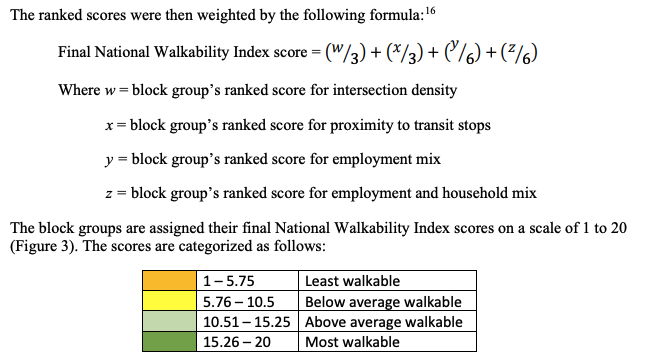

# 1 Correlation Matrix of walkability index


combining with the PCA analysis, both showing that the locality of the original data and its potential to be reduced.

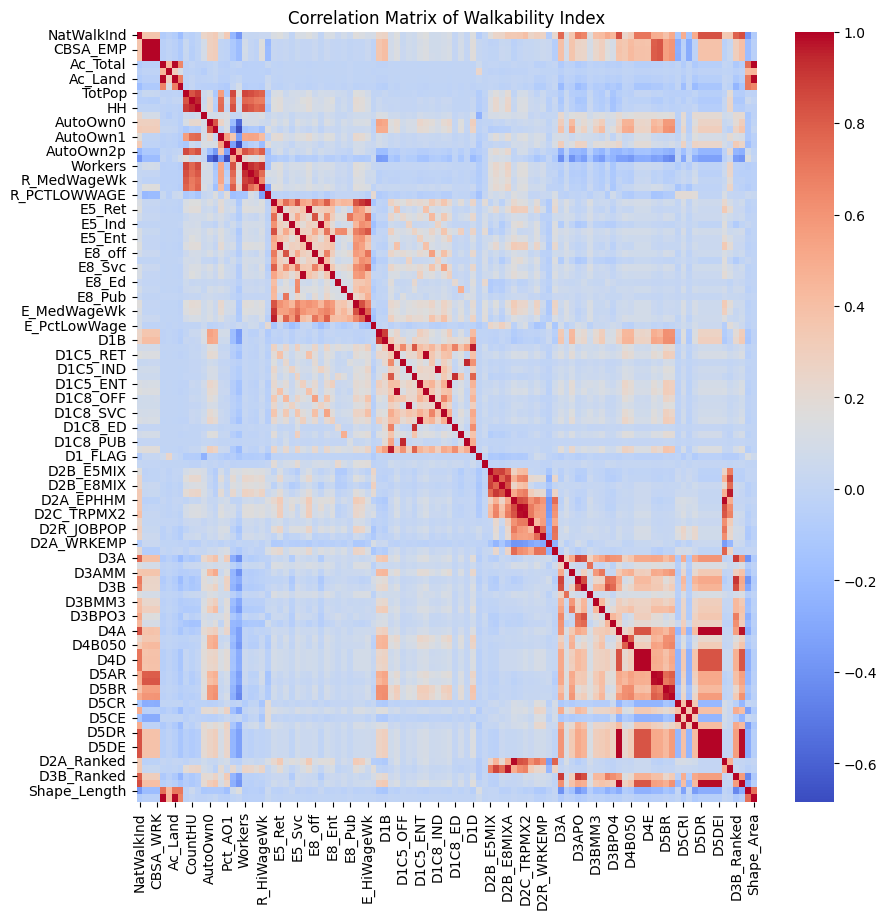

In [7]:
import scripts.correlation_matrix as cm

columns_to_drop = [
    "OBJECTID", "GEOID10", "GEOID20", "STATEFP", "COUNTYFP",
    "TRACTCE", "BLKGRPCE", "CSA", "CSA_Name", "CBSA", "CBSA_Name"
]

walkability_df_numeric_data = cm.drop_unnecessary_columns(walkability_df, columns_to_drop)
walkability_df_numeric_data = cm.move_column_to_first(walkability_df_numeric_data, 'NatWalkInd')
corr_matrix = cm.plot_correlation_matrix(walkability_df_numeric_data)


The red squares shows there is local correlation and duplication of the data columns.

/Users/ziyanzhou/Desktop/UCSD/ECE143/project/ECE143Project/scripts/correlation_barplot.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette=palette)


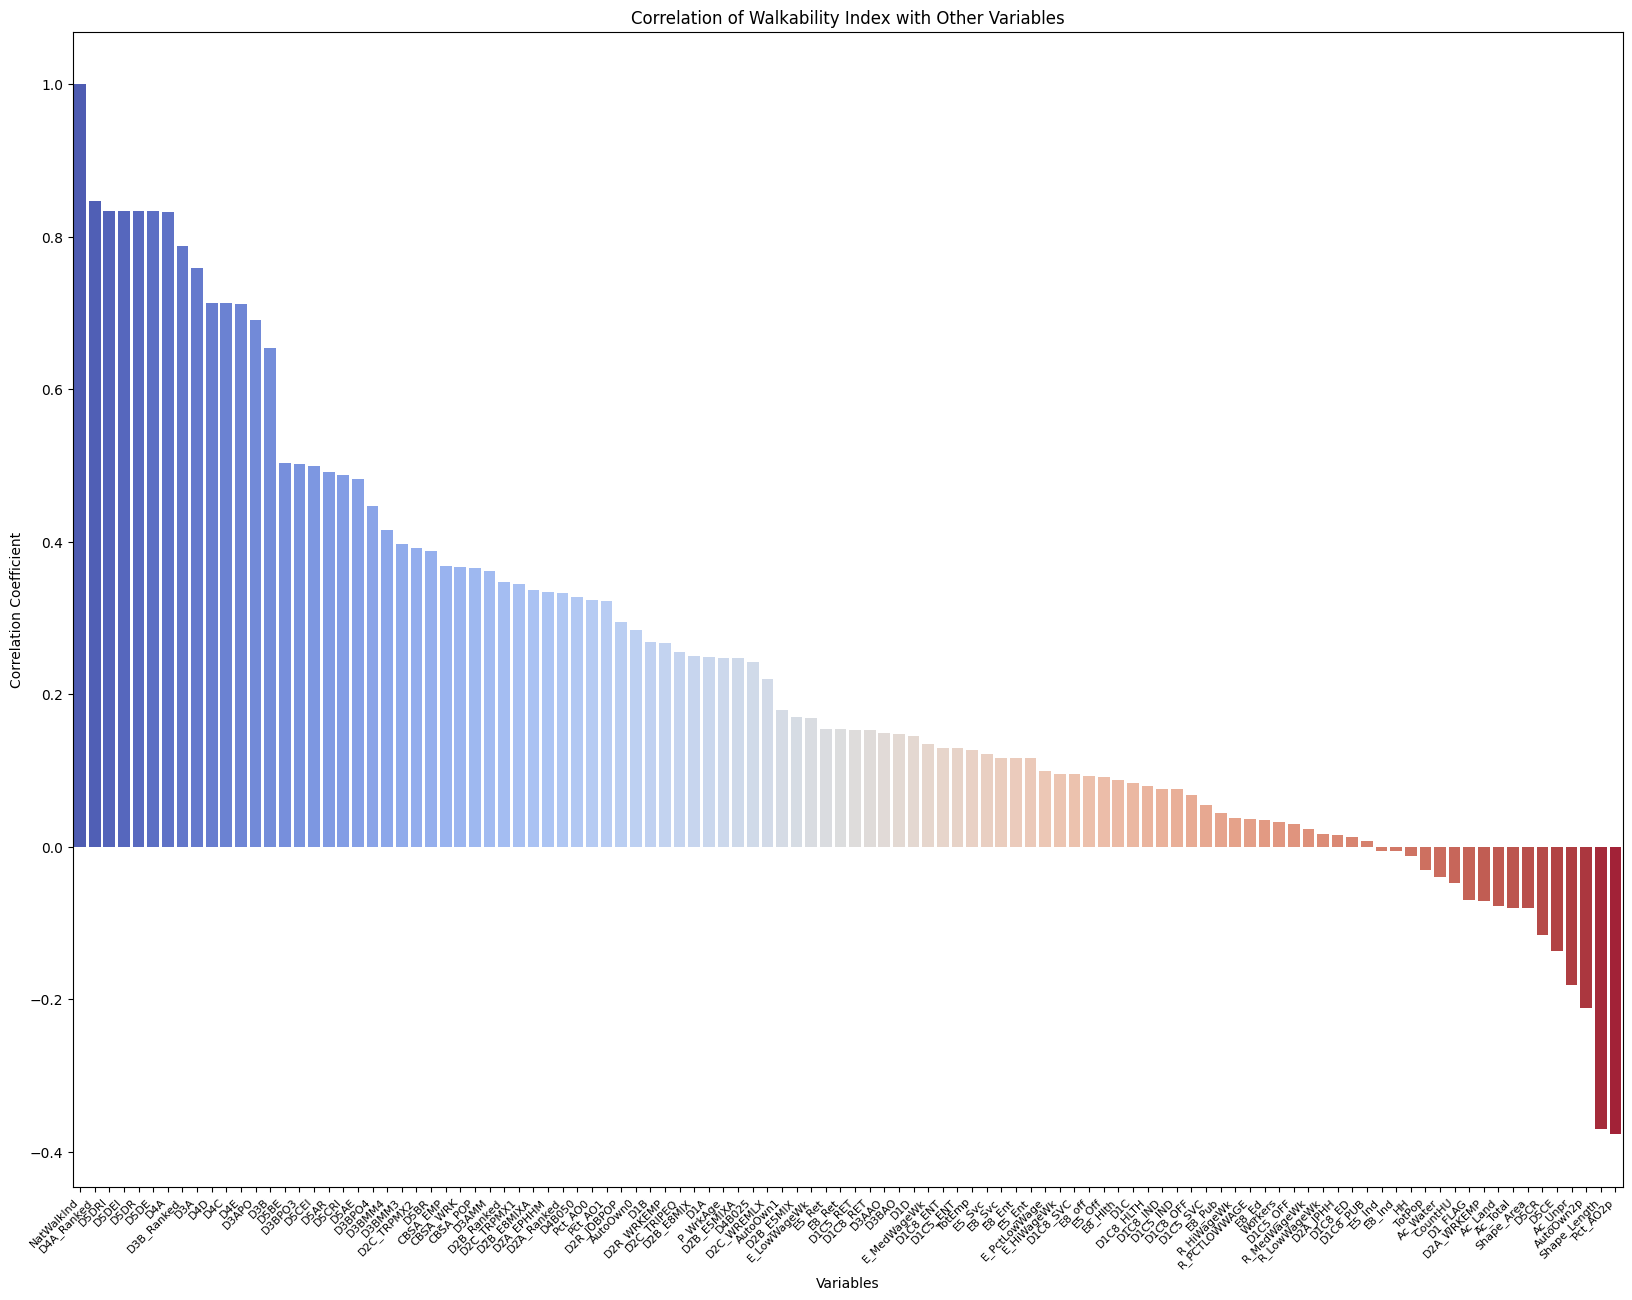

In [8]:
import scripts.correlation_barplot as cb

walkability_corr = cb.sort_correlations(corr_matrix, "NatWalkInd")
cb.plot_correlation_barplot(walkability_corr)

It shows some variables has 0.8 correlation with the final walkability score. Remind us:

- we could reduce it and find the most important vars.

- this index method may not be perfect and we could modify it to be better.

# 2 PCA Dimensionality Reduction

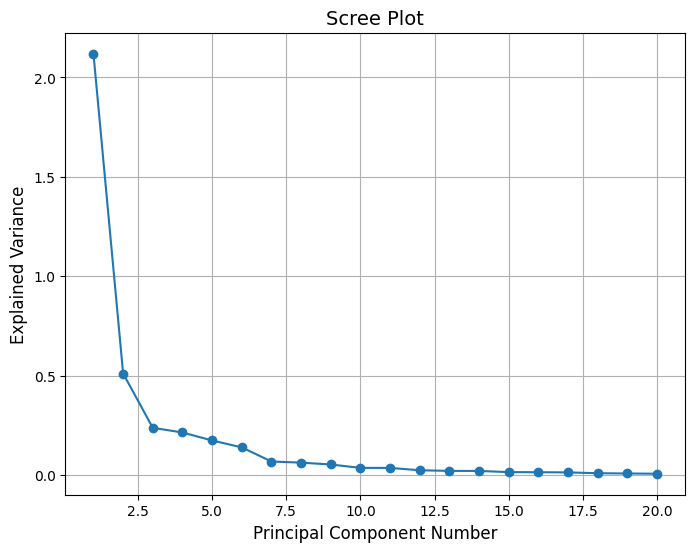

In [9]:
from scripts import pca_plot

num_comp = 20

normalized_data = pca_plot.normalize_data(walkability_df_numeric_data)
pca_model = pca_plot.perform_pca(normalized_data, num_comp)
pca_plot.plot_scree(pca_model)


In [10]:
c = pca_model.components_
c.shape

(20, 106)

This is a scree plot that is useful for determining how many components to retain from the entire feature space. From this plot we see that  most of the variance is captured by only a few components. As you increase the number of componenets, the variance decreases indicating that there is not much new useful information in most of the features. This graph allows us to see that we can estimate each sample with a very small dimension without loosing much information by projecting the original datapoints onto a subspace spanned by the top k principal components.

In [11]:
from scripts import pca_components

pca_components.print_pca_components_info(pca_model, walkability_df_numeric_data.columns)

Principal Component 1:
	D4A: 0.3335487025331184
	D5DEI: 0.33210808575495665
	D5DRI: 0.3321080575887
	D5DR: 0.33210717045767324
	D5DE: 0.3321071704039778
Principal Component 2:
	D2A_Ranked: -0.3623809902551093
	D2C_WREMLX: -0.3354072952078195
	D2R_WRKEMP: -0.3014882957274113
	D2C_TRPMX2: -0.30039211033539204
	D2C_TRIPEQ: -0.28792278806782096
Principal Component 3:
	D2B_E5MIX: -0.3233938228826119
	D2B_E8MIX: -0.30566788288221775
	D2B_Ranked: -0.30418987528860103
	D2B_E5MIXA: -0.2873227785328353
	CBSA_EMP: -0.2839140471604087
Principal Component 4:
	CBSA_POP: 0.3940993988953853
	CBSA_EMP: 0.39290308960118425
	CBSA_WRK: 0.39002587959953355
	D2B_E5MIX: -0.2560248675103765
	D2B_E8MIX: -0.2366660204677565
Principal Component 5:
	D4E: -0.4526901984431134
	D4C: -0.4526214272674694
	D4D: -0.4486431399288164
	D3B_Ranked: 0.2151400891280176
	D5CRI: 0.18791427872374822


In [12]:
components_dict = pca_components.create_components_dict(pca_model.components_, walkability_df_numeric_data, pca_model.explained_variance_ratio_, num_comp)

In [13]:
normalized_components_dict = pca_components.normalize_components(components_dict)

In [14]:
normalized_components_dict_5 = {}
normalized_components_dict_5['Principal ComOponent 1'] = normalized_components_dict['Principal Component 1']
normalized_components_dict_5['Principal Component 2'] = normalized_components_dict['Principal Component 2']
normalized_components_dict_5['Principal Component 3'] = normalized_components_dict['Principal Component 3']
normalized_components_dict_5['Principal Component 4'] = normalized_components_dict['Principal Component 4']
normalized_components_dict_5['Principal Component 5'] = normalized_components_dict['Principal Component 5']

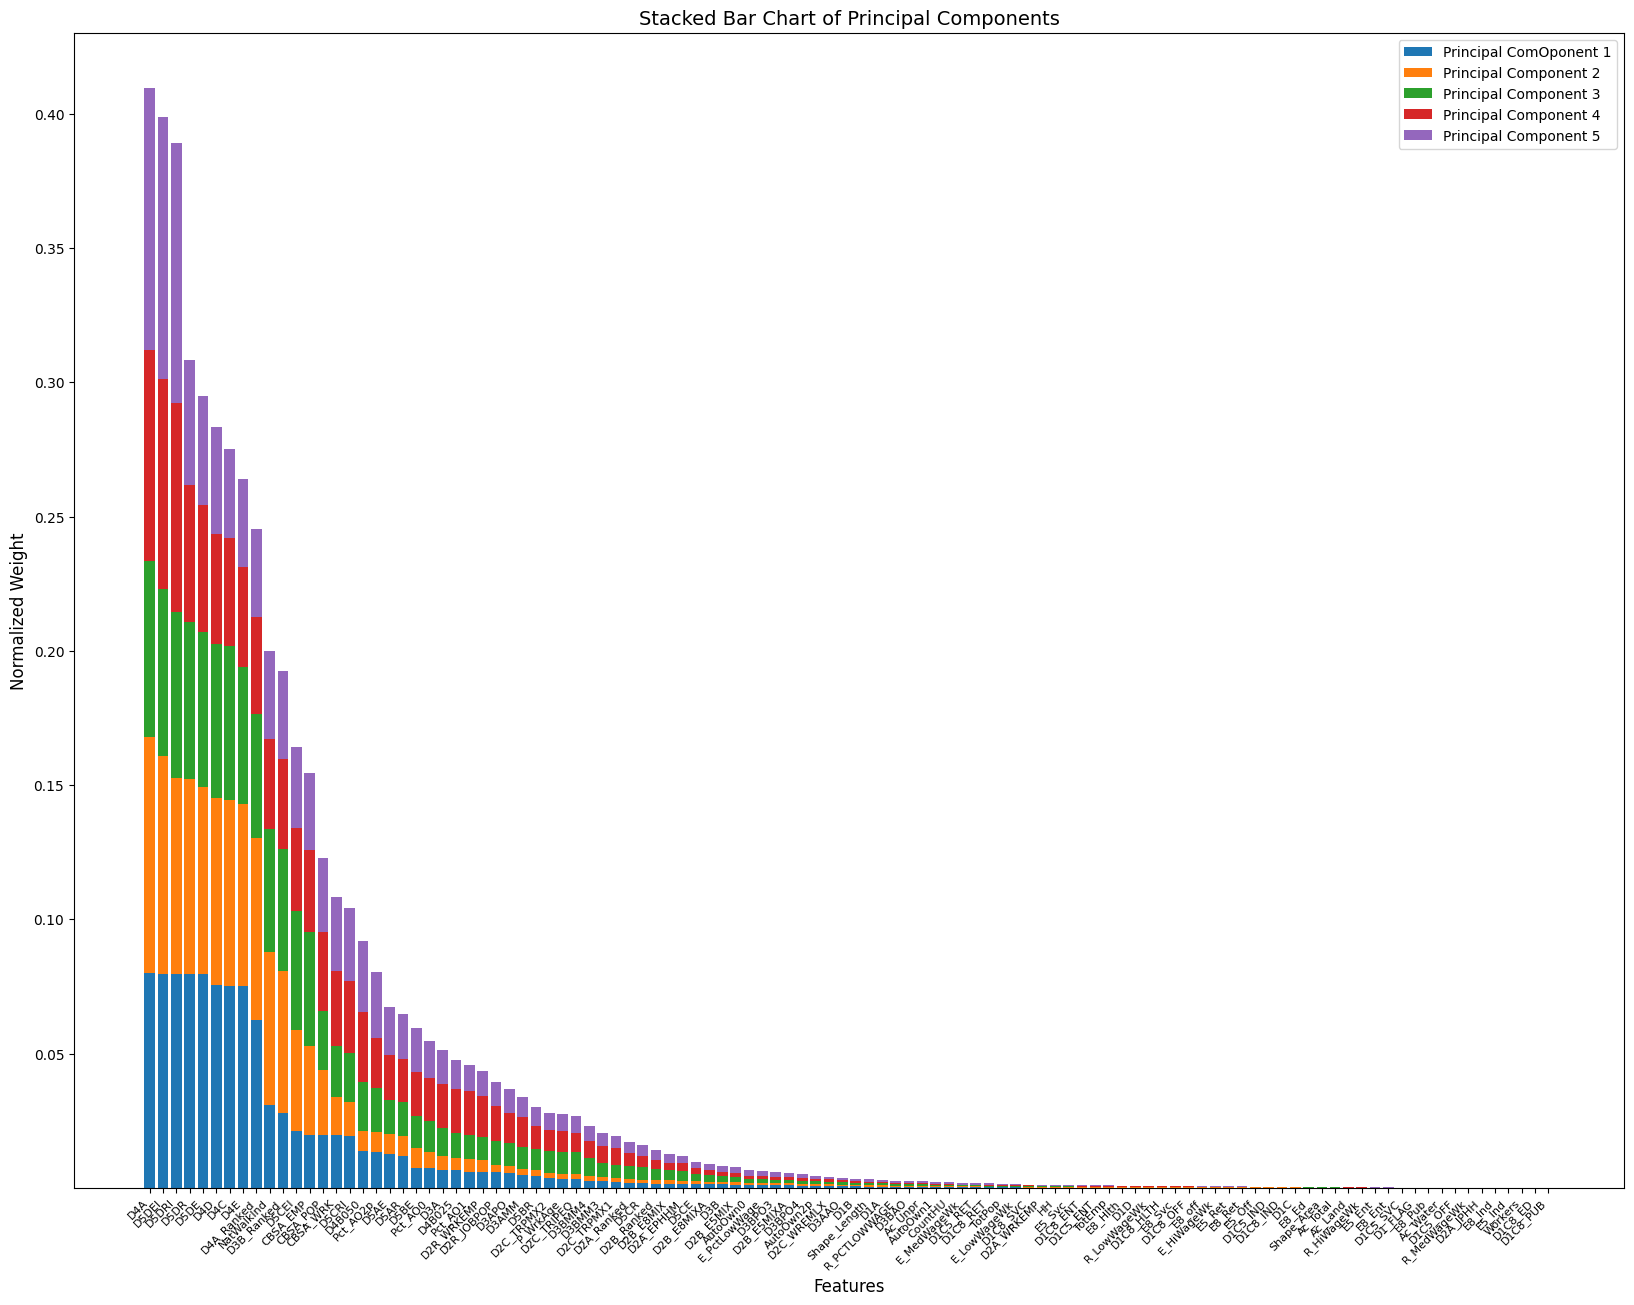

In [15]:
pca_plot.plot_stacked_bar(normalized_components_dict_5)

Shows the heaviness of each feature in the top 5 components. It has significant long-tail distribution. Most of the features have almost 0 impact in the PCA (not explaining the source of variance).


The top factors are:

- D4A: Proximity to transit stops: Distance from population center to nearest transit stop in meters. Shorter distances correlate with more walk trips.

- D5DEI/D5DE: Proportional Accessibility of Regional Destinations - Transit (Working age population accessibility)

- D5DRI/D5DR: Proportional Accessibility to Regional Destinations - Transit (Employment accessibility)

- D4D: Aggregate frequency of transit service per square mile

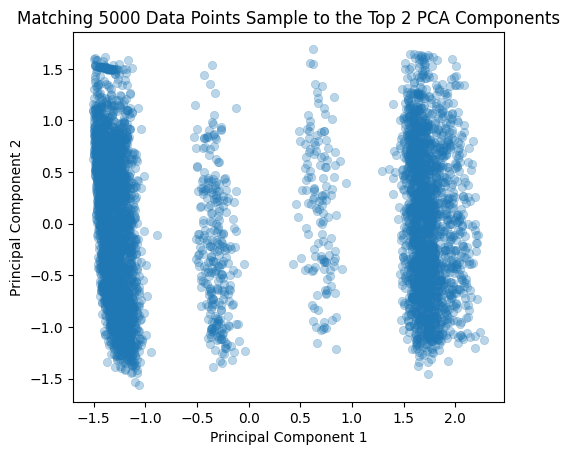

In [16]:
from scripts import pca_plot
import numpy as np

random_indices = np.random.choice(normalized_data.shape[0], size=5000, replace=False)
normalized_data_sampled = normalized_data[random_indices]
pca_plot.pca_plot_scatter(normalized_data_sampled)

The data shows some degree of clustering on both the first and second principal components. indicate that there is some grouping in the original data, and that these groupings are still distinguishable when mapped to the principal component space.


# 3 new walkability index algorithm

possibly create new walkability index algorithm (look at the docs here its pretty simple just a sum of other stuff)


-- compare to old rankings

How to evaluate it? How do we know our new designed algorithm is "better" than the old one? - zhou



We are using 2 different new ways of walkability index algorithm.


- First is PCA-inspired. We use the top k PCA components to define the new index algorithm. (Not fully done yet, PCA is for variance, and we actually want something able to compare)

- Second is we use out source data to define a happiness-based walkability index algorithm that better reflect people's feeling.

# intersection of happiness index and Walkability

Create dataframe that is intersection of happiness index and Walkability
will require finding corresponding CSA (combined statistical area code) for each city in happiness city


In [17]:
# csa_df = pd.read_csv("/content/drive/MyDrive/ECE143_Final_Project/QCEW County-MSA-CSA Crosswalk, 2013-2022.csv")

In [18]:
# csa_df['MSA Title'] = csa_df['MSA Title'].str.replace(" MSA$", "", regex=True)
# csa_df['CSA Code'] = csa_df['CSA Code'].str.replace("^CS", "", regex=True)
# csa_df['CSA Title'] = csa_df['CSA Title'].str.replace(" CSA$", "", regex=True)

In [19]:
# csa_df

In [20]:
# print(happiness_df['City'].head)

In [21]:
# walkability_df = walkability_df.dropna(subset=['CSA'])
# walkability_df['CSA'] = walkability_df['CSA'].astype(int)

In [22]:
# csa_df = csa_df.dropna(subset=['CSA Code'])
# csa_df['CSA Code'] = csa_df['CSA Code'].astype(int)

In [23]:
# csa_df['CSA Code'].unique()

In [24]:
# walkability_df['CSA'].unique()

In [25]:
from scripts import merge_df_happiness_walkability as mhw

happiness_df = mhw.load_and_clean_happiness_data(happiness_file_path, ["Unnamed: 0", "Overall Rank "])

In [26]:
happiness_df = mhw.preprocess_dataframe(happiness_df, ['CBSA'], 'CBSA')
walkability_df = mhw.preprocess_dataframe(walkability_df, ['CBSA'], 'CBSA')

/Users/ziyanzhou/Desktop/UCSD/ECE143/project/ECE143Project/scripts/merge_df_happiness_walkability.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[int_column] = df[int_column].astype(int)
/Users/ziyanzhou/Desktop/UCSD/ECE143/project/ECE143Project/scripts/merge_df_happiness_walkability.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[int_column] = df[int_column].astype(int)


In [27]:
# we need happiness_df & walkability_df to have a 'CBSA' column
# then
merged_df = mhw.merge_dataframes_on_cbsa(happiness_df, walkability_df)

print(merged_df.head())

          City  Total Score   Emotional & Physical Well-Being   \
0  Fremont, CA          76.1                                 1   
1  Fremont, CA          76.1                                 1   
2  Fremont, CA          76.1                                 1   
3  Fremont, CA          76.1                                 1   
4  Fremont, CA          76.1                                 1   

   Income & Employment   Community & Environment  CSA Code_x   index   CBSA  \
0                    34                         1       none  1547.0  41860   
1                    34                         1       none  1547.0  41860   
2                    34                         1       none  1547.0  41860   
3                    34                         1       none  1547.0  41860   
4                    34                         1       none  1547.0  41860   

   Metropolitan Division Code  CSA Code_y  ...         D5DRI          D5DE  \
0                     36084.0       488.0  ...    

In [28]:
average_df, merged_with_average = mhw.calculate_and_merge_average_natwalkind(merged_df)

print(average_df.head())
print(merged_with_average.head())

              City   CBSA  Average NatWalkInd
0        Akron, OH  10420            7.458409
1  Albuquerque, NM  10740           11.232456
2     Amarillo, TX  11100           10.716503
3      Anaheim, CA  31080           13.484239
4    Anchorage, AK  11260            9.896071
        City  Total Score   Emotional & Physical Well-Being   \
0  Akron, OH         39.65                               165   
1  Akron, OH         39.65                               165   
2  Akron, OH         39.65                               165   
3  Akron, OH         39.65                               165   
4  Akron, OH         39.65                               165   

   Income & Employment   Community & Environment  CSA Code_x  index   CBSA  \
0                   168                       156        NaN   15.0  10420   
1                   168                       156        NaN   15.0  10420   
2                   168                       156        NaN   15.0  10420   
3                   168    

create new correlation matrix with previous studies happiness


In [29]:
from scripts import inverse_normalize_columns as inc

columns_to_normalize = ['Income & Employment ', 'Emotional & Physical Well-Being ', 'Community & Environment ']

# Apply inverse normalization to the specified columns
merged_with_average = inc.inverse_normalize_columns(merged_with_average, columns_to_normalize)

# Display the first few rows of the DataFrame to verify changes
print(merged_with_average.head())

        City  Total Score   Emotional & Physical Well-Being   \
0  Akron, OH         39.65                          0.088889   
1  Akron, OH         39.65                          0.088889   
2  Akron, OH         39.65                          0.088889   
3  Akron, OH         39.65                          0.088889   
4  Akron, OH         39.65                          0.088889   

   Income & Employment   Community & Environment  CSA Code_x  index   CBSA  \
0              0.072222                  0.134078        NaN   15.0  10420   
1              0.072222                  0.134078        NaN   15.0  10420   
2              0.072222                  0.134078        NaN   15.0  10420   
3              0.072222                  0.134078        NaN   15.0  10420   
4              0.072222                  0.134078        NaN   15.0  10420   

   Metropolitan Division Code  CSA Code_y  ...    D5DRI     D5DE    D5DEI  \
0                         NaN       184.0  ... -99999.0 -99999.0 -999

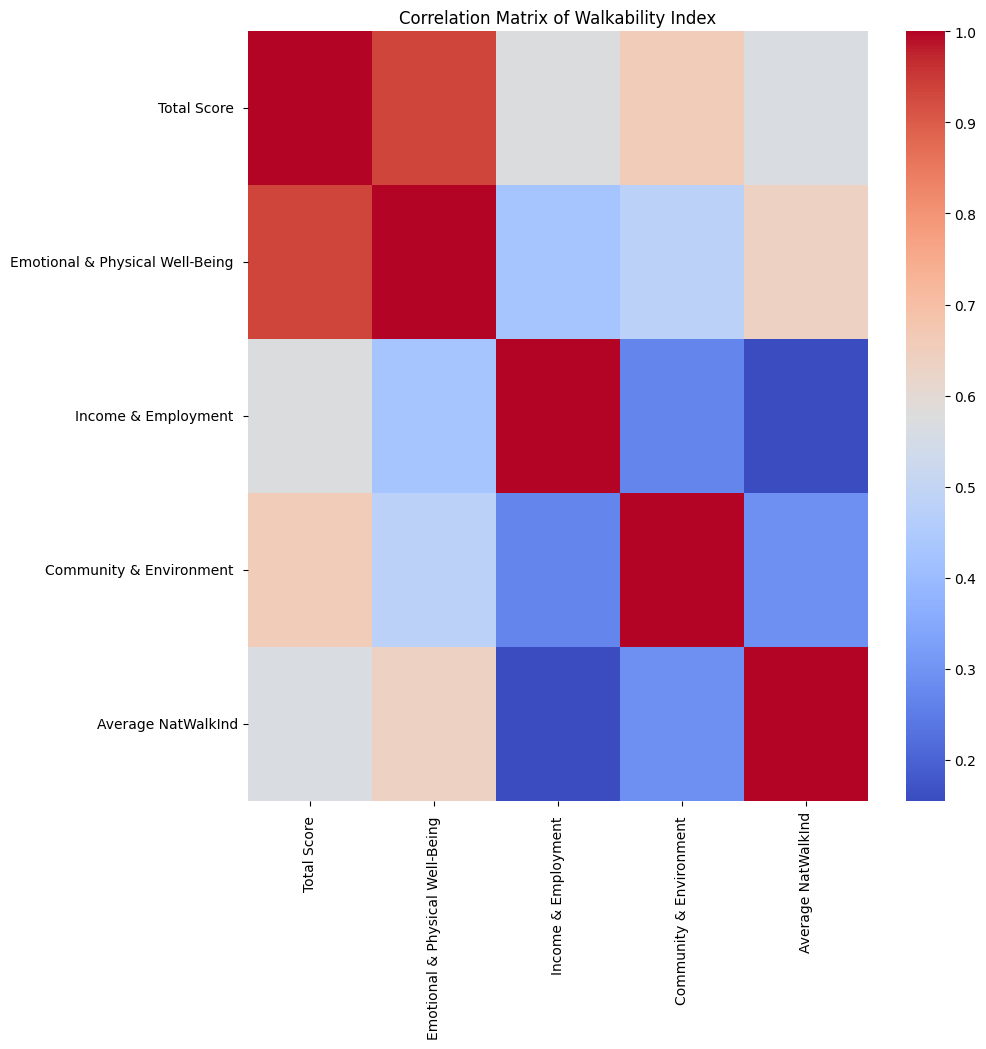

In [30]:
columns_to_include = ['Total Score ', 'Emotional & Physical Well-Being ', 'Income & Employment ', 'Community & Environment ', 'Average NatWalkInd']

corr_matrix = cm.plot_correlation_matrix(merged_with_average[columns_to_include])

In [31]:
corr_matrix

,Total Score,Emotional & Physical Well-Being,Income & Employment,Community & Environment,Average NatWalkInd
Total Score,1.000000,0.934702,0.572798,0.657197,0.564763
Emotional & Physical Well-Being,0.934702,1.000000,0.425919,0.478599,0.636091
Income & Employment,0.572798,0.425919,1.000000,0.267425,0.154153
Community & Environment,0.657197,0.478599,0.267425,1.000000,0.292046
Average NatWalkInd,0.564763,0.636091,0.154153,0.292046,1.000000


the Correlation between Happiness v.s. walkability is quite reasonable. walkability and happiness score have 0.56 correlation. And is most related to Emotional & Physical Well-Being of the city.

In [32]:
from scripts import prepare_data_regression


features_not_include = ['Emotional & Physical Well-Being ', 'Income & Employment ', 'Community & Environment ',
                        'OBJECTID', 'City', 'City', 'Total Score ', 'CSA Code_x', 'index', 'CBSA',
                        'Metropolitan Division Code', 'CSA Code_y', 'Metropolitan/Micropolitan Statistical Area',
                        'Metropolitan Division Title', 'CSA Title', 'County/County Equivalent', 'State Name',
                        'FIPS State Code', 'FIPS County Code', 'Central/Outlying County', 'CSA_Name', 'CBSA_Name',
                        'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'CSA', 'CBSA_POP',
                        'CBSA_EMP', 'CBSA_WRK']

X, y, feature_list, merged_df = prepare_data_regression.prepare_data_for_regression(merged_df, 'Total Score ', features_not_include)

/Users/ziyanzhou/Desktop/UCSD/ECE143/project/ECE143Project/scripts/prepare_data_regression.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


In [33]:
# X.columns.values.tolist()

In [34]:
from scripts import regression_model as reg

model, mse = reg.train_and_evaluate_regression_model(X, y)

Mean Squared Error: 11.626598114233026


Use parameter as weight to get the new happiness-inspired walkability index method.

And then calculate the correlation between the new index method v.s. the real happiness

In [35]:
coefficients = model.coef_

predictions = model.predict(X)
merged_df['New Walkability'] = predictions

correlation = merged_df['New Walkability'].corr(merged_df['Total Score '])
print(f"Correlation between Predictions and Total Score: {correlation}")

Correlation between Predictions and Total Score: 0.7040084668138061


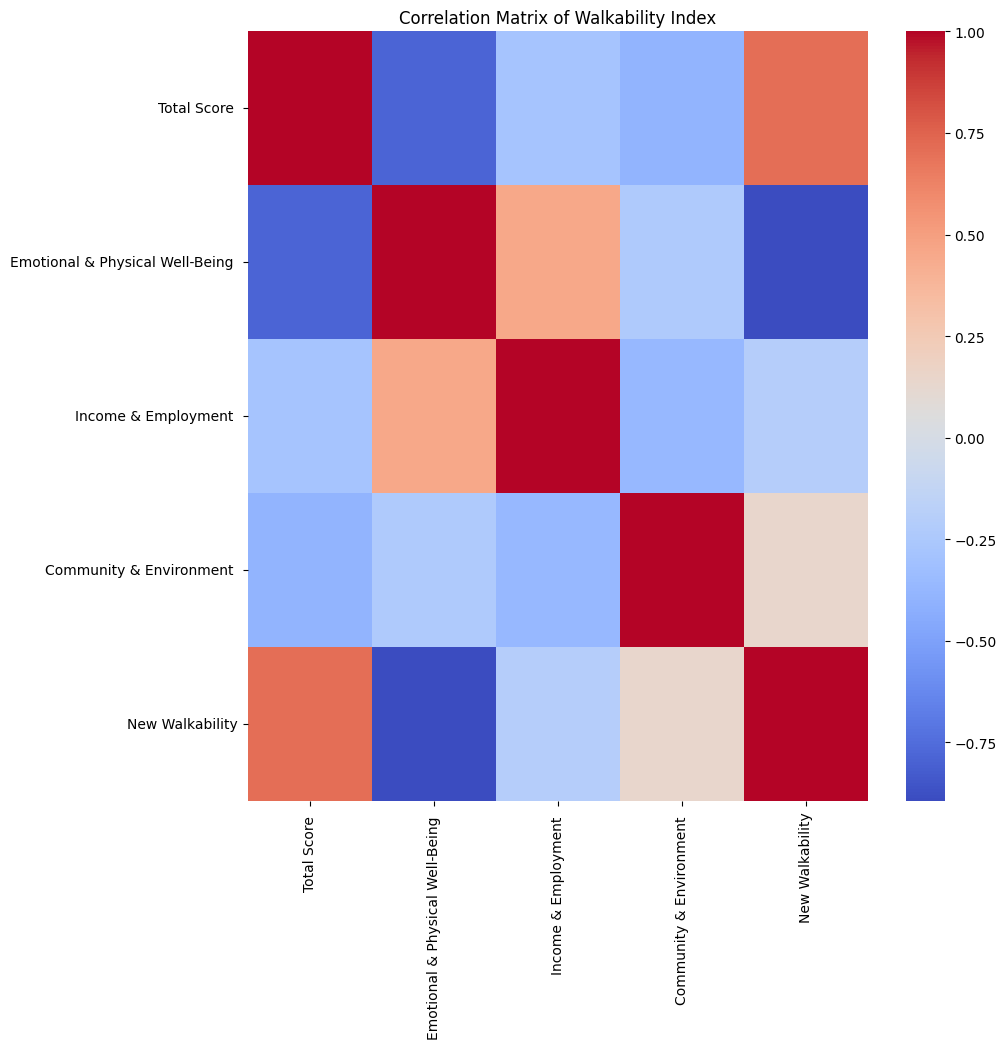

In [36]:
columns_to_include = ['Total Score ', 'Emotional & Physical Well-Being ', 'Income & Employment ', 'Community & Environment ', 'New Walkability']

corr_matrix = cm.plot_correlation_matrix(merged_df[columns_to_include])

actually new walk v.s. other variables do not make sense. (it is not important anyway)

# Data visualization

use geographic mapping libraries to display data with corresponding city
(possible reccomendation system that zhou recommended)